In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
print(recent_date)

2017-08-23


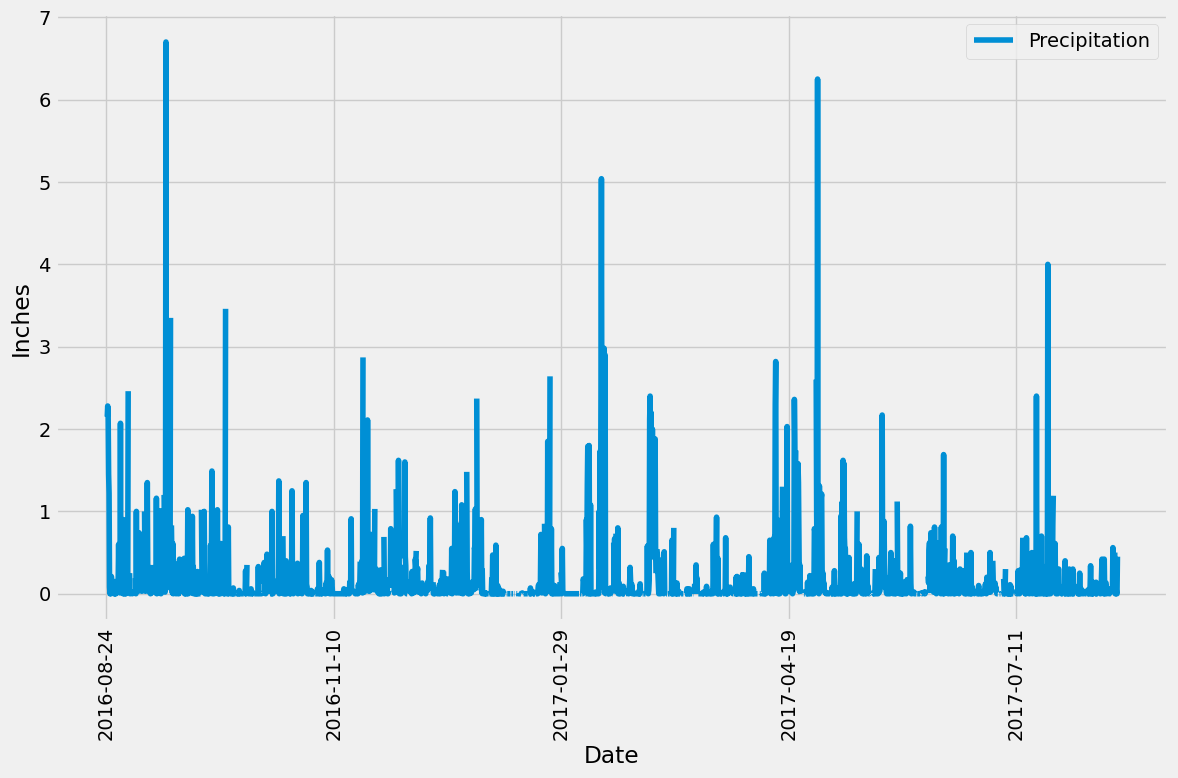

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.datetime.strptime(recent_date, '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
start_date = latest_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation']).set_index('Date')

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize = (12,8), rot = 90)
plt.ylabel ('Inches')
plt.legend(loc='best')
plt.tight_layout()

# Save figure
plt.savefig("Images/Precipitation_Plot.png", bbox_inches = 'tight')

# Show plot
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station).count()
print(total_stations)

9


In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_list = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
stations_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = stations_list[0][0]
session.query(measurement.station,\
             func.min(measurement.tobs),\
             func.max(measurement.tobs),\
             func.avg(measurement.tobs)).\
             filter(measurement.station == most_active_station).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

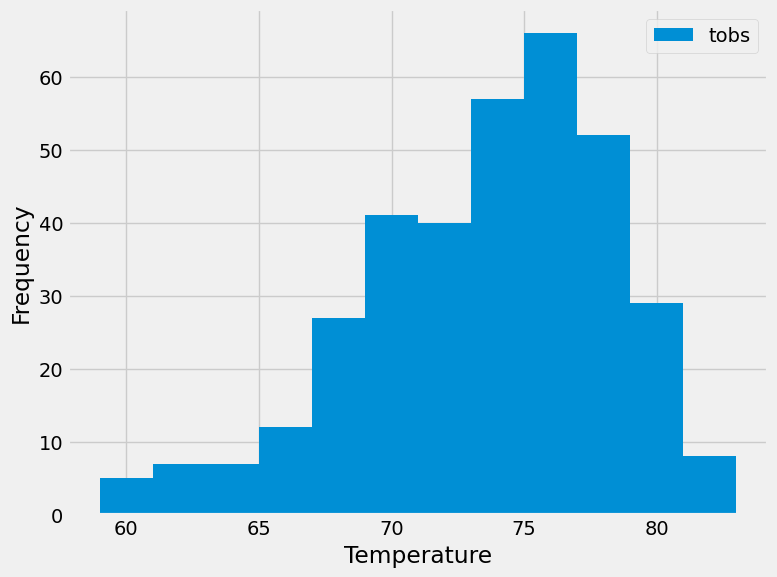

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(measurement.tobs).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= start_date).all()
station_df = pd.DataFrame(station_data)
station_df.plot(kind = 'hist', figsize = (8,6), bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'],loc='best')
plt.tight_layout()

# Save figure
plt.savefig("Images/Temperature_histogram.png", bbox_inches = 'tight')

# Show plot
plt.show()

# Close session

In [47]:
# Close Session
session.close()